# Google Play store: 
Context
- While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

Content
- Each app (row) has values for catergory, rating, size, and more.

Acknowledgements
- This information is scraped from the Google Play Store. This app information would not be available without it.

Inspiration
- The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

The Internet is a true gold mine of data. E-commerce and review sites are brimming with a lot of untapped data with a prominent potential to convert into meaningful insights that can help with robust decision making. Here, we explore using data science and machine learning techniques on data retrieved from one such avenue on the internet, the Google Play Store.

The objective of this analysis is to predict the rating of the App (before/after launching it on the Play Store)

## Dataset information: 
1. App -  Name of the Application. 
2. Category - Category the app belongs to
3. Rating - Overall user rating of the app (as when scraped)
4. Reviews - Number of user reviews for the app (as when scraped)
4. Size - Size of the app (as when scraped)
5. Installs - Number of user downloads/installs for the app (as when scraped)
6. Type -Paid or Free
7. Price - Price of the App.
8. Content Rating - Age group the app is targeted at - Children / Mature 21+ / Adult
9. Genres - An app can belong to multiple genres (apart from its main category).
10. Last updated - recent which the app was updated 
11. Current ver - Current version of the app.
12. Android Ver - Android version that supports the app. 

In [718]:
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Load data:

In [719]:
data = pd.read_csv('googleplaystore.csv')

In [720]:
data.head() 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Coloring book moana,ART_AND_DESIGN,3.9,78158306.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,78128208.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,69119316.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,69119316.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
4,Paper flowers instructions,ART_AND_DESIGN,4.4,69109672.0,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up


### Shape of the data:

In [721]:
data.shape

(10841, 13)

10,841 rows and 13 columns 

In [722]:
data.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.193338,4.443887e+05
std,0.537431,2.927728e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.479800e+04
max,19.000000,7.815831e+07


### Missing Values 

In [723]:
data.isnull().sum(), data.isnull().sum()/len(data)* 100 

(App                  0
 Category             0
 Rating            1474
 Reviews              0
 Size                 0
 Installs             0
 Type                 1
 Price                0
 Content Rating       1
 Genres               0
 Last Updated         0
 Current Ver          8
 Android Ver          3
 dtype: int64,
 App                0.000000
 Category           0.000000
 Rating            13.596532
 Reviews            0.000000
 Size               0.000000
 Installs           0.000000
 Type               0.009224
 Price              0.000000
 Content Rating     0.009224
 Genres             0.000000
 Last Updated       0.000000
 Current Ver        0.073794
 Android Ver        0.027673
 dtype: float64)

- There are 1474 missing values in Rating (13.5% of the data)
- 8 records missing in Current version (0.07% of the data)
- 3 records missing in Android Version (0.02%)

### Data types of the column: 

In [724]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [725]:
data['Category'].value_counts() 

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

### Reformatting features and checking consistency
There are a variety of features within the dataset and it is important to convert them into the right format such that we can analyse them easily. This would include converting datetime features and string features.

- Changing Reviews, Size, Price to Numerical columns. 
- Change Last Updated to datetype. 
- Imputing rows where Ratings are null. 
- Convert Installs to numerical, remove '+'. 
- Deleting duplicate rows. 
- Dropping Android_ver column. 


In [726]:
data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Coloring book moana,ART_AND_DESIGN,3.9,78158306.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,78128208.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [727]:
# Converting the data types: 
# Reviews:
data['Reviews'] = data['Reviews'].astype('int')

In [728]:
data = data[data.Size != 'Varies with device']

In [729]:
# Finding sizes in KB 
temp = np.array(data.Size.str.find('k'))
ls = np.where(temp > 0)
ls

(array([  54,  168,  286,  321,  327,  335,  591,  596,  752, 1104, 1106,
        1114, 1124, 1126, 1134, 1709, 1726, 1730, 1736, 1740, 1741, 1968,
        1969, 2479, 2484, 2486, 2522, 2534, 2542, 2593, 2598, 2933, 2978,
        2993, 3005, 3031, 3050, 3064, 3112, 3182, 3212, 3263, 3277, 3279,
        3281, 3375, 3386, 3404, 3414, 3482, 3536, 3558, 3652, 3674, 3693,
        3725, 3728, 3742, 3745, 3748, 3749, 3754, 3776, 3797, 3808, 3812,
        3819, 3882, 3894, 3899, 3968, 3990, 3993, 4000, 4078, 4098, 4176,
        4178, 4187, 4209, 4228, 4274, 4288, 4296, 4410, 4458, 4467, 4486,
        4504, 4577, 4578, 4602, 4627, 4665, 4673, 4701, 4738, 4773, 4882,
        4913, 4926, 4948, 4980, 4990, 5008, 5055, 5122, 5124, 5126, 5128,
        5130, 5132, 5133, 5135, 5138, 5140, 5141, 5142, 5143, 5144, 5145,
        5149, 5150, 5152, 5153, 5154, 5156, 5157, 5158, 5199, 5215, 5217,
        5218, 5277, 5293, 5302, 5311, 5327, 5328, 5331, 5334, 5336, 5340,
        5349, 5352, 5361, 5366, 5372, 

In [730]:
# Size: 
data.Size = data.Size.str.replace('M','')
data.Size = data.Size.str.replace('k','')
data.Size = data.Size.str.replace('+','')
data.Size = data.Size.str.replace(',','')

In [731]:
data.Size = data.Size.astype('float')
data.Size.describe() 

count    9146.000000
mean       37.140728
std        99.379785
min         1.000000
25%         5.600000
50%        15.000000
75%        34.000000
max      1020.000000
Name: Size, dtype: float64

In [732]:
for x in ls:
    data.iloc[x,4]=data.iloc[x,4]*0.001 # multiplying inorder to convert to M

In [733]:
data.Size.describe() 

count    9146.000000
mean       21.623514
std        24.796747
min         0.008500
25%         4.900000
50%        13.000000
75%        30.000000
max      1000.000000
Name: Size, dtype: float64

In [734]:
#installs : 
data.Installs = data.Installs.str.replace('+','')
data.Installs = data.Installs.str.replace(',','')
data = data[data['Installs']!='Free']
data['Installs'] = data['Installs'].astype('int') 

In [735]:
# Price: 
data['Price'] = data['Price'].str.replace('$','')
data['Price'] = data['Price'].astype('float')

In [736]:
# Converting to date type: 
data['Last Updated'] = pd.to_datetime(data['Last Updated'])

In [737]:
data.sample(5) 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5823,Axe Clicker,FAMILY,4.3,1143,64.0,500000,Free,0.0,Everyone,Casual,2018-07-13,1.0.142,4.0.3 and up
179,SH-02J Owner's Manual (Android 8.0),BOOKS_AND_REFERENCE,NaN,6003590,7.2,50000,Free,0.0,Everyone,Books & Reference,2018-06-15,3,6.0 and up
9671,Masha and the Bear Child Games,FAMILY,4.1,3,92.0,10000000,Free,0.0,Everyone,Adventure;Education,2018-05-08,2.7.4,4.0 and up
1692,Shooting King,GAME,4.4,183846,69.0,10000000,Free,0.0,Everyone 10+,Sports,2018-05-25,1.4.2,4.0.3 and up
8278,Pepsi Cards DC,COMICS,NaN,30,21.0,50,Free,0.0,Everyone 10+,Comics,2018-06-26,0.0.4,4.4 and up


Lets check the data type after: 

In [738]:
data.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int32
Size                     float64
Installs                   int32
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

In [739]:
# Splitting Genre into two: 
data['Genres_1'] = data.Genres.apply(lambda x: x.split(';')[0])
data['Genres_2'] = data.Genres.apply(lambda x: x.split(';')[1:2])
data.head() 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Genres_1,Genres_2
0,Coloring book moana,ART_AND_DESIGN,3.9,78158306,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Art & Design,[Pretend Play]
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,78128208,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,Art & Design,[]
2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,69119316,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,Art & Design,[]
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,69119316,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,Art & Design,[Creativity]
4,Paper flowers instructions,ART_AND_DESIGN,4.4,69109672,5.6,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1,2.3 and up,Art & Design,[]


# ---

In [740]:
data.shape

(9145, 15)

In [741]:
# dropping android version: 
data.drop('Android Ver',axis =1, inplace = True)

In [742]:
data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Genres_1,Genres_2
5610,Plants vs. Zombies™ Heroes,FAMILY,4.4,1619,68.0,10000000,Free,0.00,Everyone,Casual;Action & Adventure,2018-06-26,1.28.01,Casual,[Action & Adventure]
2281,OmniMedix Medical Calculator,MEDICAL,4.7,87045,1.2,1000,Paid,4.99,Everyone,Medical,2016-06-11,3.1.6,Medical,[]
1578,Van Nien 2018 - Lich Van su & Lich Am,LIFESTYLE,4.4,217736,23.0,1000000,Free,0.00,Everyone,Lifestyle,2018-06-01,3.9.3,Lifestyle,[]
9765,ER Doctor Kids Emergency Room,FAMILY,3.1,2,30.0,500000,Free,0.00,Teen,Casual,2018-06-13,1.9,Casual,[]
5461,Access Point Proximity,TOOLS,NaN,2012,2.3,1000,Free,0.00,Everyone,Tools,2018-06-28,2.1.1,Tools,[]


In [743]:
# removing the duplicates: 
# shape before removing:
data.shape

(9145, 14)

In [744]:
data.App.value_counts()

ROBLOX                                             9
Candy Crush Saga                                   7
8 Ball Pool                                        7
Nick                                               6
Bubble Shooter                                     6
                                                  ..
I Screen Dialer                                    1
Marathi DP - status and message,jokes,Video app    1
DR.MEEP                                            1
Camera Pro                                         1
The grand theft V Wallpaper                        1
Name: App, Length: 8434, dtype: int64

In [745]:
data = data.drop_duplicates('App')

In [746]:
# Shape after duplicating: 
data.shape

(8434, 14)

In [747]:
data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Genres_1,Genres_2
0,Coloring book moana,ART_AND_DESIGN,3.9,78158306,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,Art & Design,[Pretend Play]
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,78128208,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,Art & Design,[]


In [748]:
data.reset_index(inplace = True)
data.head() 

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Genres_1,Genres_2
0,0,Coloring book moana,ART_AND_DESIGN,3.9,78158306,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,Art & Design,[Pretend Play]
1,1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,78128208,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,Art & Design,[]
2,2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,69119316,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,Art & Design,[]
3,3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,69119316,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,Art & Design,[Creativity]
4,4,Paper flowers instructions,ART_AND_DESIGN,4.4,69109672,5.6,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1,Art & Design,[]


In [749]:
data.drop('index',axis = 1, inplace = True)
data.head() 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Genres_1,Genres_2
0,Coloring book moana,ART_AND_DESIGN,3.9,78158306,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,Art & Design,[Pretend Play]
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,78128208,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,Art & Design,[]
2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,69119316,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,Art & Design,[]
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,69119316,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,Art & Design,[Creativity]
4,Paper flowers instructions,ART_AND_DESIGN,4.4,69109672,5.6,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1,Art & Design,[]


## Exploratory Data analysis:

## Univariate Analysis of Numeric values:

In [750]:
# missing values: 
data.isnull().sum() 

App                  0
Category             0
Rating            1405
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Genres_1             0
Genres_2             0
dtype: int64

In this section we will take a look at the rating which is the target variable. It is crucial to understand it in detail as this is what we are trying to predict accurately.

In [751]:
data['Rating'].describe() 

count    7029.000000
mean        4.160777
std         0.559150
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [752]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    std = data[i].std() 

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.distplot(data[i],kde =True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; STD= {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2), round(std,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

### Rating

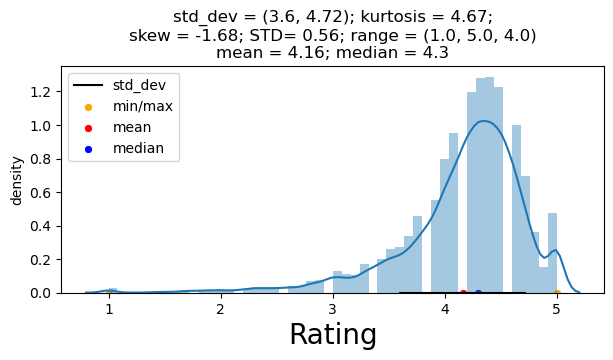

In [753]:
UVA_numeric(data, ['Rating'])

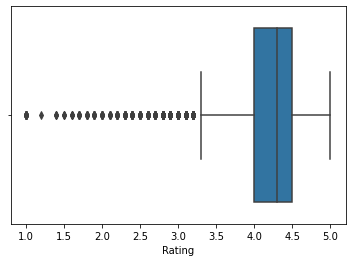

In [754]:
sns.boxplot(data['Rating'])

In [755]:
iqr = data['Rating'].quantile(0.75) - data['Rating'].quantile(0.25)
q1 = data['Rating'].quantile(0.25)
q2 = data['Rating'].quantile(0.75)
max_value = q2 + (1.5*iqr)
min_value= q1 - (1.5*iqr)
min_value, max_value

(3.25, 5.25)

In [756]:
# To find the number of Outliers
ls3=[]
for i,x in enumerate(data.Rating):
    if x < min_value:
        ls3.append(i)
        
len(ls3)

463

- We can see the distribution is left skewed. Median is greater than the mean. and with the native value of skew. 
- Most of the ratings range from 3 to 4. 
- Standard Deviation is less than the mean which means the data is clustered around the mean. 
- There are a lot of outliers present. (5.3%) 463 outliers.
- All the outliers seem important for analysis, we might need to train our model with and without the outliers and conduct a further analysis on whether to drop them or not, later on.

### Reviews

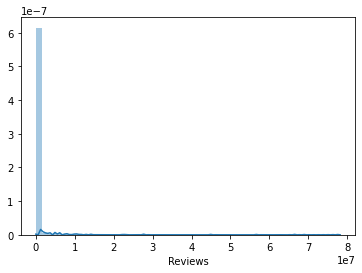

In [757]:
sns.distplot(data['Reviews'])

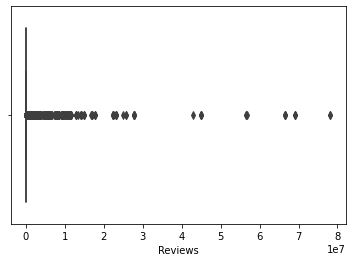

In [758]:
sns.boxplot(data['Reviews'])

- highly skewed, lets transform it. 

In [759]:
data['Review_log'] = np.log(data['Reviews'])

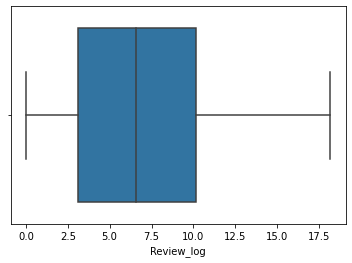

In [760]:
sns.boxplot(data['Review_log'])

### Size:

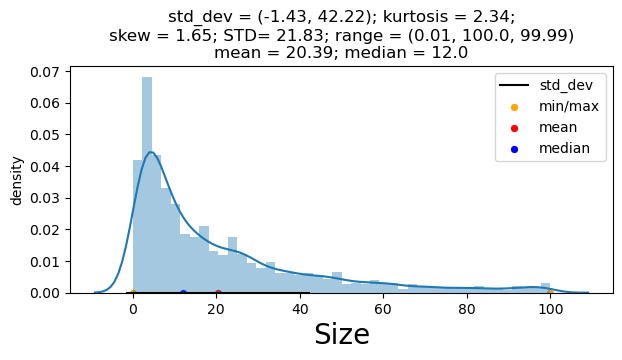

In [761]:
UVA_numeric(data,['Size'])

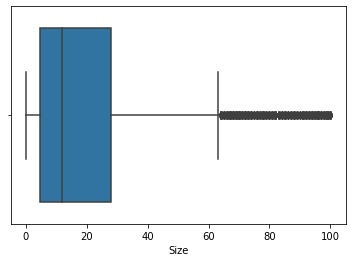

In [762]:
sns.boxplot(data['Size'])

- Its highly right skewed, median is less than the mean. 
- Standard deviation is higher than mean which means the data is not clustered around the mean. 
- Also kurtosis is higher than 2 which means its not nrmal and outliers are present. 

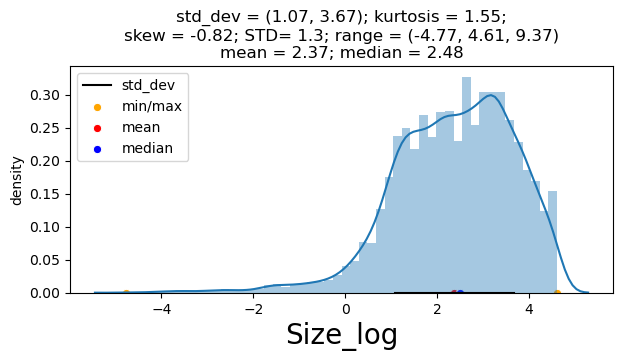

In [763]:
# After log transformation: 
data['Size_log'] = np.log(data['Size'])
UVA_numeric(data,['Size_log'])

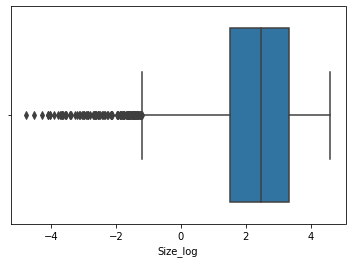

In [764]:
sns.boxplot(data['Size_log'])

- There a lot of outliers present in the data.
- The data is moderately normal (But skewness is in the acceptable range).

### Installs

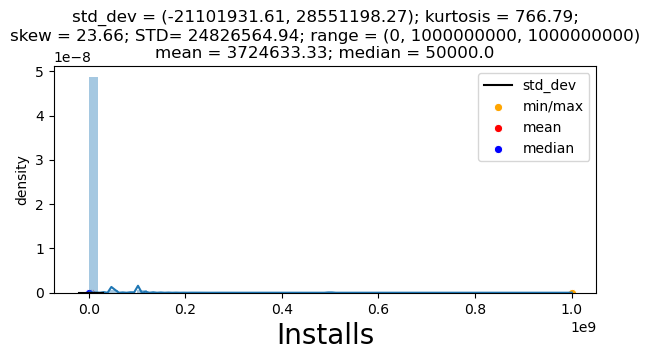

In [765]:
UVA_numeric(data,['Installs'])

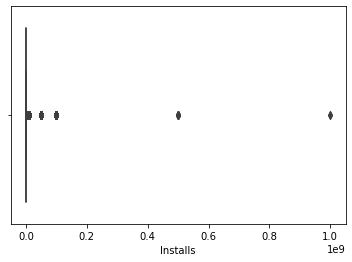

In [766]:
sns.boxplot(data['Installs'])

Extreme values present. 

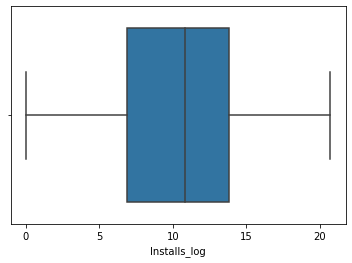

In [767]:
# taking log: 
data['Installs_log'] = np.log(data['Installs'])
sns.boxplot(data['Installs_log'])

### Price 

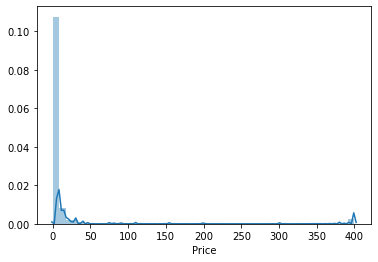

In [768]:
sns.distplot(data[data['Type']=='Paid'].Price);

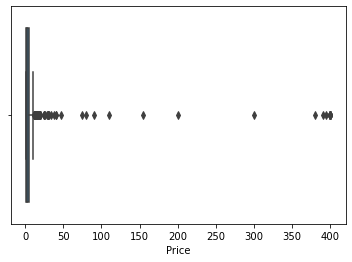

In [769]:
sns.boxplot(data[data['Type']=='Paid'].Price);

1.8711144952092202

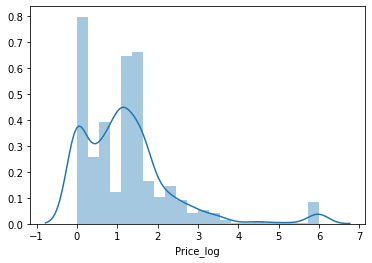

In [770]:
data['Price_log'] = np.log(data[data['Type']=='Paid'].Price)
data.Price_log.fillna(0,inplace=True)
sns.distplot(data[data['Type']=='Paid'].Price_log);
data[data['Type']=='Paid'].Price_log.skew()

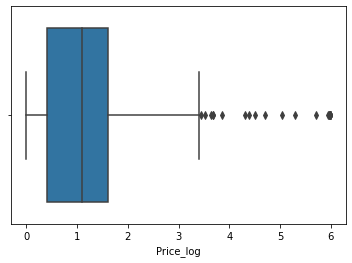

In [771]:
sns.boxplot(data[data['Type']=='Paid'].Price_log);

We can conclude from the above graphs, that the skewness has been dropped significantly with the log transformation, and number of outliers has also been reduced.

## Bivariate Analysis: 

In [772]:
# Grouping Category based on Rating. 
cat = pd.DataFrame(data.groupby('Category')['Rating'].mean())
cat.reset_index(inplace = True)
cat.sort_values(inplace = True, by = 'Rating')
top_10 = cat.sort_values(by='Rating',ascending = False).head(10)
top_10

,Category,Rating
10,EVENTS,4.478947
8,EDUCATION,4.373864
0,ART_AND_DESIGN,4.361017
22,PARENTING,4.347727
23,PERSONALIZATION,4.325362
3,BOOKS_AND_REFERENCE,4.322695
2,BEAUTY,4.291892
27,SOCIAL,4.257692
32,WEATHER,4.242000
14,GAME,4.235697


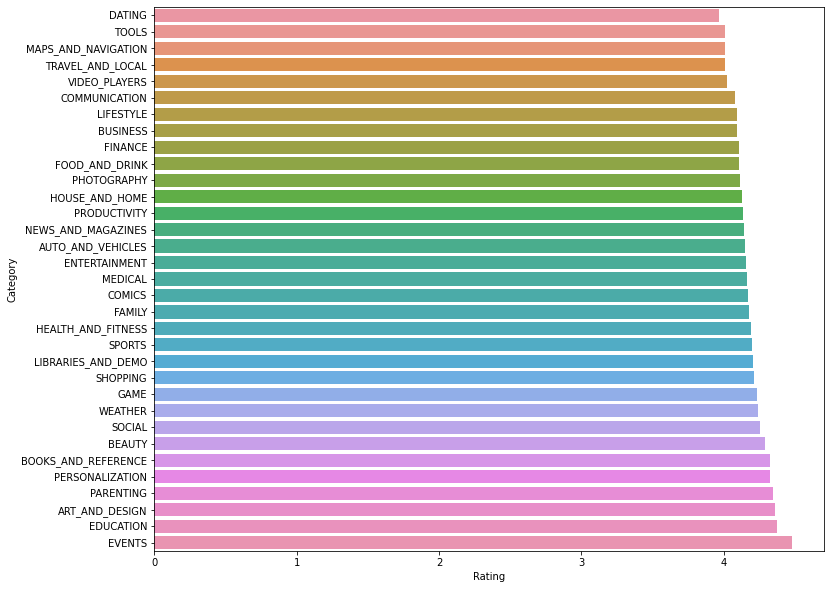

In [773]:
plt.figure(figsize=(12,10))
sns.barplot(x='Rating',y = 'Category',data = cat)


Apps that comes under the category Events have the highest rating. And Dating apps has the least. 

### Type vs rating 

In [774]:
types = pd.DataFrame(data.groupby('Type')['Rating'].mean())
types.reset_index(inplace = True)
types

,Type,Rating
0,Free,4.153792
1,Paid,4.244547


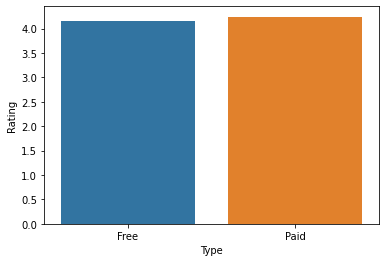

In [775]:
sns.barplot(x = 'Type',y = 'Rating', data = types)

Type of the app does not make an impact on its rating. though Paid apps are slightly rated higher than Free apps. 

### Content_rating vs Rating: 

In [776]:
content = pd.DataFrame(data.groupby('Content Rating')['Rating'].mean() )
content.sort_values(by = 'Rating',ascending = True, inplace =True)
content.reset_index(inplace = True) 
content

,Content Rating,Rating
0,Unrated,4.100000
1,Mature 17+,4.107895
2,Everyone,4.151337
3,Teen,4.225546
4,Everyone 10+,4.232432
5,Adults only 18+,4.550000


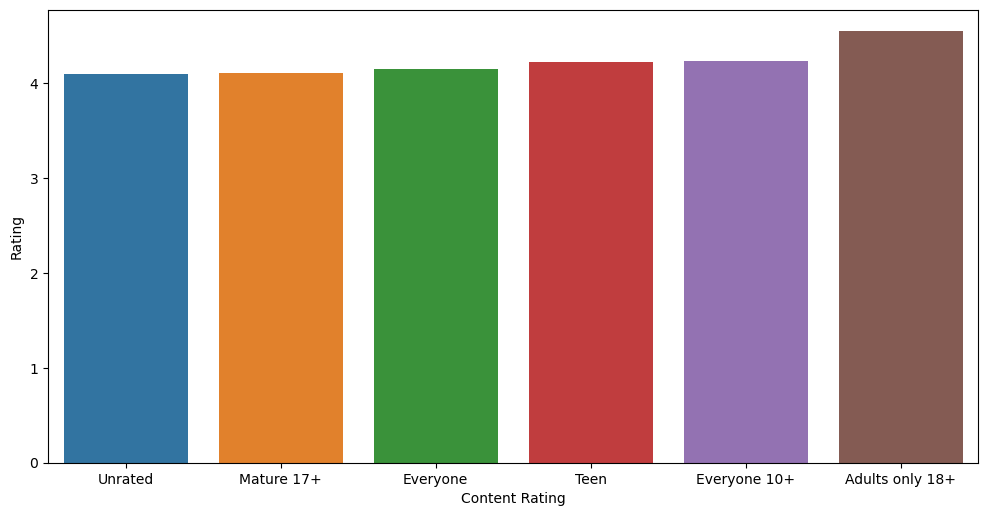

In [777]:
plt.figure(figsize=(12,6), dpi = 100)
sns.barplot(x = 'Content Rating', y = 'Rating', data = content)
plt.show()

Adults only app has the highest rating. Unrated has the least but still 4. 

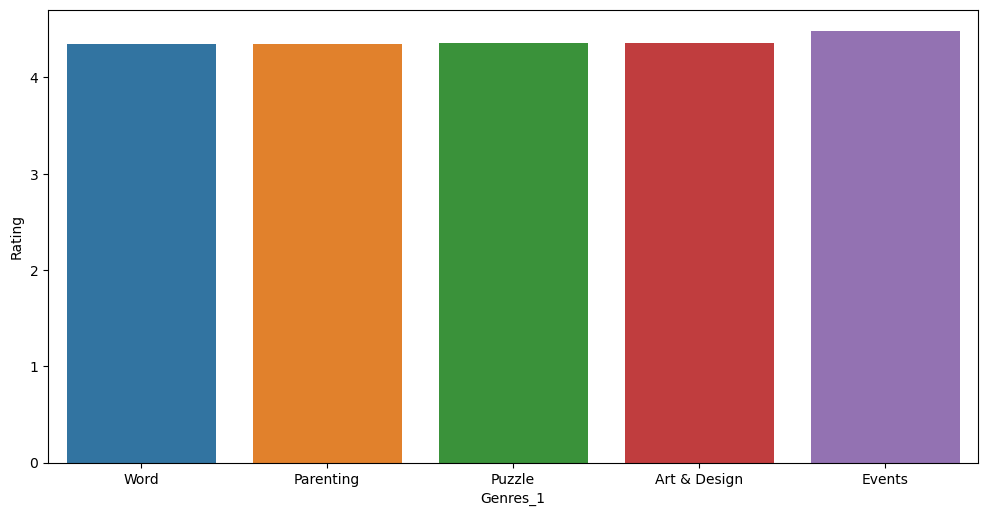

In [811]:
curr = pd.DataFrame(data.groupby('Genres_1')['Rating'].mean() )
curr.sort_values(by = 'Rating',ascending = True, inplace =True)
curr.reset_index(inplace = True) 
top_gen = curr.tail()
plt.figure(figsize=(12,6), dpi = 100)
sns.barplot(x = 'Genres_1', y = 'Rating', data = top_gen)
plt.show()

## Bivariate - Numerical Analysis:

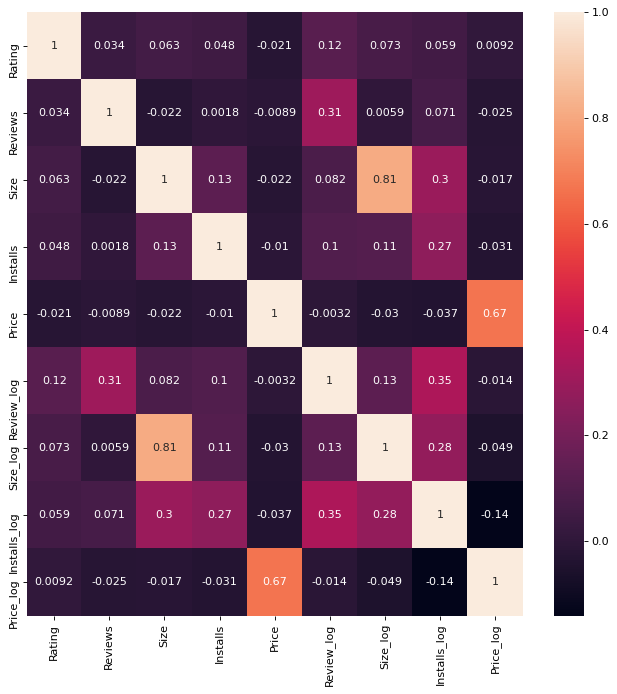

In [778]:
plt.figure(figsize=(10,10), dpi = 80) 
sns.heatmap(data.corr(), annot = True) 


#### Correlation Matrix

In [779]:
Corr = data.dropna().corr()
Corr

,Rating,Reviews,Size,Installs,Price,Review_log,Size_log,Installs_log,Price_log
Rating,1.000000,0.037711,0.062634,0.047560,-0.021176,0.120449,0.073021,0.059240,0.009160
Reviews,0.037711,1.000000,-0.027286,-0.000978,-0.008890,0.309667,0.004459,0.052063,-0.026086
Size,0.062634,-0.027286,1.000000,0.131710,-0.025713,0.068473,0.812626,0.297809,-0.022175
Installs,0.047560,-0.000978,0.131710,1.000000,-0.010567,0.099888,0.112584,0.294399,-0.033870
Price,-0.021176,-0.008890,-0.025713,-0.010567,1.000000,0.006390,-0.033045,-0.054474,0.666457
Review_log,0.120449,0.309667,0.068473,0.099888,0.006390,1.000000,0.131123,0.322709,-0.008588
Size_log,0.073021,0.004459,0.812626,0.112584,-0.033045,0.131123,1.000000,0.306249,-0.058106
Installs_log,0.059240,0.052063,0.297809,0.294399,-0.054474,0.322709,0.306249,1.000000,-0.178042
Price_log,0.009160,-0.026086,-0.022175,-0.033870,0.666457,-0.008588,-0.058106,-0.178042,1.000000


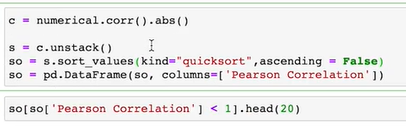

In [780]:
numerical = data[['Size','Price','Installs','Reviews','Rating']]

In [781]:
c = numerical.corr().abs() 
s = c.unstack() 
so = s.sort_values(kind = 'quicksort', ascending = False) 
so = pd.DataFrame(so, columns = ['Pearson Corr'])
so[so['Pearson Corr']<1]

Pearson Corr
Size     Installs      0.134270
Installs Size          0.134270
Rating   Size          0.062839
Size     Rating        0.062839
Installs Rating        0.047597
Rating   Installs      0.047597
         Reviews       0.034194
Reviews  Rating        0.034194
Size     Price         0.022425
Price    Size          0.022425
Size     Reviews       0.022119
Reviews  Size          0.022119
Price    Rating        0.021155
Rating   Price         0.021155
Installs Price         0.010149
Price    Installs      0.010149
         Reviews       0.008862
Reviews  Price         0.008862
Installs Reviews       0.001795
Reviews  Installs      0.001795

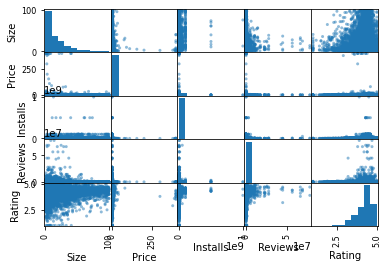

In [782]:
pd.plotting.scatter_matrix(numerical);

## Google play store apps Rating Feature Engineering & Model Building¶

In [1106]:
df = data.copy() 

In [1107]:
df.head() 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Genres_1,Genres_2,Review_log,Size_log,Installs_log,Price_log
0,Coloring book moana,ART_AND_DESIGN,3.9,78158306,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,Art & Design,[Pretend Play],18.174247,2.639057,13.122363,0.0
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,78128208,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,Art & Design,[],18.173862,2.163323,15.424948,0.0
2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,69119316,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,Art & Design,[],18.051345,3.218876,17.727534,0.0
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,69119316,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,Art & Design,[Creativity],18.051345,1.029619,11.512925,0.0
4,Paper flowers instructions,ART_AND_DESIGN,4.4,69109672,5.6,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1,Art & Design,[],18.051205,1.722767,10.819778,0.0


## Preprocessing & Feature Extraction
As is clear from the previous modules, we can only feed numeric features as input to our models. So our next task is to convert the features in numeric form. It is time to jump into getting our data ready for feeding into the model but before that it is important to use the variables to do some feature engineering as.

In [1108]:
# Converting type - free to 0 and paid to 1 by creating a column paid (0 or 1)
def type(col): 
    if col == 'Free':
        return 0
    elif col == 'Paid':
        return 1
df['Paid'] = df['Type'].apply(type)

In [1109]:
# Dropping Current ver. 
df.drop('Current Ver', axis = 1, inplace = True)

In [1110]:
# Dropping Genre: 
df.drop('Genres', axis = 1, inplace = True)

In [1111]:
df.drop('Genres_1', axis = 1, inplace = True)

In [1112]:
df.drop('Genres_2', axis = 1, inplace = True)

In [1113]:
# df.drop('Type', axis = 1, inplace = True)

In [1114]:
df.drop('Last Updated', axis = 1, inplace = True)

In [1115]:
df.head() 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Review_log,Size_log,Installs_log,Price_log,Paid
0,Coloring book moana,ART_AND_DESIGN,3.9,78158306,14.0,500000,Free,0.0,Everyone,18.174247,2.639057,13.122363,0.0,0
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,78128208,8.7,5000000,Free,0.0,Everyone,18.173862,2.163323,15.424948,0.0,0
2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,69119316,25.0,50000000,Free,0.0,Teen,18.051345,3.218876,17.727534,0.0,0
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,69119316,2.8,100000,Free,0.0,Everyone,18.051345,1.029619,11.512925,0.0,0
4,Paper flowers instructions,ART_AND_DESIGN,4.4,69109672,5.6,50000,Free,0.0,Everyone,18.051205,1.722767,10.819778,0.0,0


In [1116]:
df.drop('App', axis = 1, inplace = True)

In [1117]:
df = df[['Category','Rating', 'Reviews','Size','Installs','Price','Content Rating','Type']]

In [1118]:
encoded = pd.get_dummies(df)

In [1119]:
encoded.sample(5)

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Type_Free,Type_Paid
1958,NaN,31596,3.7,1000000,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
290,4.4,2119235,11.0,5000000,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2282,4.4,18622,7.5,1000000,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
295,4.6,1971777,44.0,1000000,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
893,3.9,254861,13.0,1000000,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [1120]:
encoded.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING',
       'Category_EDUCATION', 'Category_ENTERTAINMENT', 'Category_EVENTS',
       'Category_FAMILY', 'Category_FINANCE', 'Category_FOOD_AND_DRINK',
       'Category_GAME', 'Category_HEALTH_AND_FITNESS',
       'Category_HOUSE_AND_HOME', 'Category_LIBRARIES_AND_DEMO',
       'Category_LIFESTYLE', 'Category_MAPS_AND_NAVIGATION',
       'Category_MEDICAL', 'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER',
       'Content Rating_Adults only 18+', 'Content Rating_Everyon

In [1121]:
encoded.isnull().sum() 

Rating                            1405
Reviews                              0
Size                                 0
Installs                             0
Price                                0
Category_ART_AND_DESIGN              0
Category_AUTO_AND_VEHICLES           0
Category_BEAUTY                      0
Category_BOOKS_AND_REFERENCE         0
Category_BUSINESS                    0
Category_COMICS                      0
Category_COMMUNICATION               0
Category_DATING                      0
Category_EDUCATION                   0
Category_ENTERTAINMENT               0
Category_EVENTS                      0
Category_FAMILY                      0
Category_FINANCE                     0
Category_FOOD_AND_DRINK              0
Category_GAME                        0
Category_HEALTH_AND_FITNESS          0
Category_HOUSE_AND_HOME              0
Category_LIBRARIES_AND_DEMO          0
Category_LIFESTYLE                   0
Category_MAPS_AND_NAVIGATION         0
Category_MEDICAL         

In [1122]:
encoded_dropna = encoded.dropna(axis = 0)

### Segregating variables: Independent and Dependent Variables

In [1123]:
#seperating independent and dependent variables
x = encoded_dropna.drop(['Rating'], axis=1)
y = encoded_dropna['Rating']
x.shape, y.shape

((7029, 45), (7029,))

### Splitting the data into train set and the test set

In [1124]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

### Implementing Linear Regression

In [1125]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [1126]:
lr = LR() 
lr.fit(train_x, train_y)

LinearRegression()

In [1127]:
# Predicting: 
train_predict = lr.predict(train_x) 
k = mean_absolute_error(train_predict, train_y) 
r = r2_score(train_predict, train_y)
print('Training Mean Absolute Error', k )
mse = mean_squared_error(train_predict, train_y) 
print('Training Mean sq Error', mse )

Training Mean Absolute Error 0.3948092743961749
Training Mean sq Error 0.30673788058147455


In [1128]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mean_absolute_error(test_predict, test_y)
# r = r2_score(test_predict, test_y)
print('Test Mean Absolute Error    ', k )
mse = mean_squared_error(test_predict, test_y) 
print('Testing Mean sq Error', mse )

Test Mean Absolute Error     0.3850266255338151
Testing Mean sq Error 0.28878706576845414


In [1129]:
lr.coef_

array([ 5.80872097e-09,  7.47638085e-04,  1.39132074e-09, -1.00924133e-03,
        2.35396505e-02, -3.18178974e-02,  1.05230849e-01,  1.30904959e-01,
       -4.23813421e-02, -1.08575130e-01, -1.21438487e-01, -2.33772917e-01,
        1.81049738e-01, -3.19331353e-02,  3.50872901e-01, -1.27851468e-02,
       -4.49421515e-02, -7.66333784e-02,  7.75536482e-03,  4.01421015e-02,
       -8.02804799e-03,  6.32813582e-02, -3.40346107e-02, -1.23682056e-01,
       -5.39394127e-02, -2.64562050e-02,  2.29289965e-01,  1.23286342e-01,
       -7.72685312e-02, -4.40606736e-02,  6.73355165e-02,  1.03712283e-01,
        5.84311997e-03, -1.57662663e-01, -1.23226550e-01, -1.36747625e-01,
        5.71418128e-02,  3.22592021e-01, -9.88388559e-02, -7.46873378e-02,
       -8.94117183e-02, -6.30874423e-02,  3.43333317e-03, -5.47705120e-02,
        5.47705120e-02])

Text(0.5, 1.0, 'Coefficient plot')

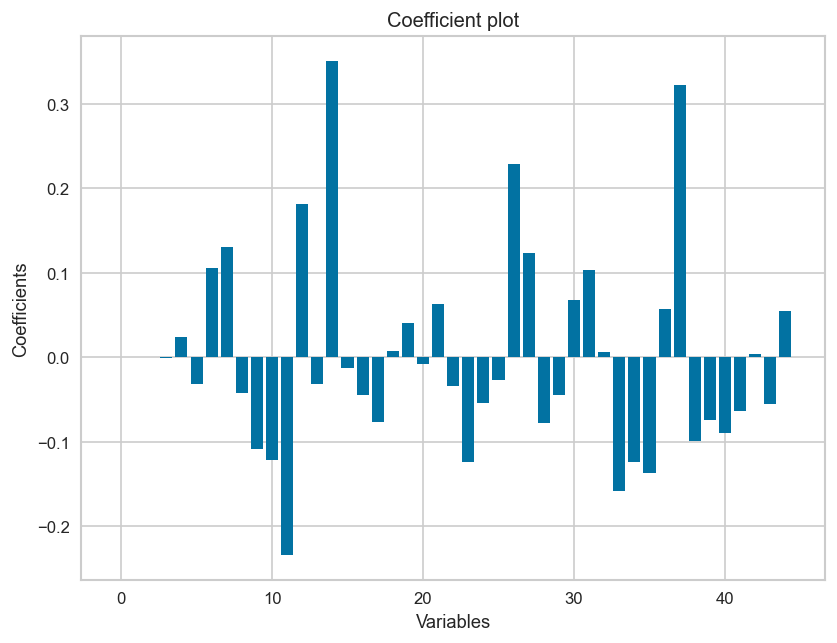

In [1130]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [1131]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
2992,4.0,4.384765,-0.384765
879,4.8,4.199897,0.600103
7405,4.9,4.134446,0.765554
2121,4.4,4.126700,0.273300
1431,4.8,4.105809,0.694191


In [1132]:
residuals.shape

(1758, 3)

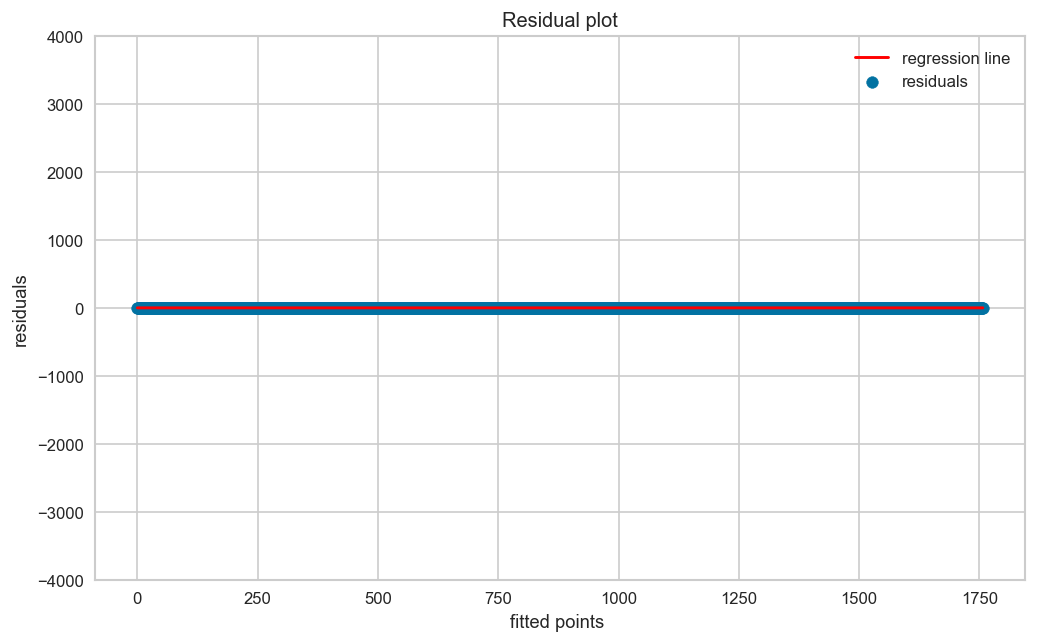

In [1133]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,1758)
k = [0 for i in range(0,1758)]
plt.scatter( f, residuals.residuals[:], label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-4000, 4000)
plt.legend()

The Residual plot clearly Looks Homoscedastic, i.e. the the variance of the error across the dataset is nearly constant.

### Checking Distribution of Residuals

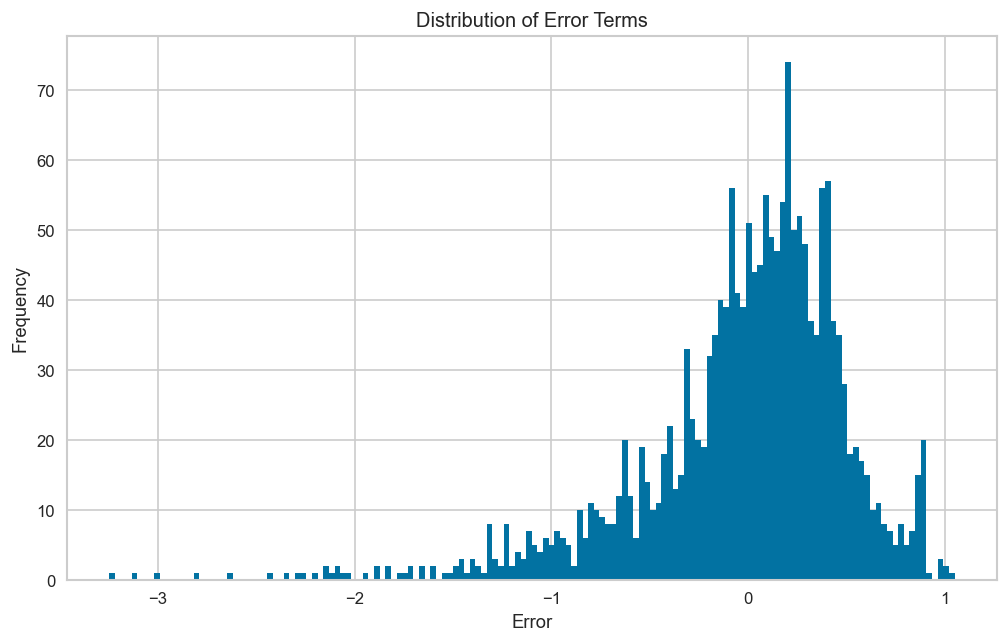

In [1134]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

According to the Histogram, the distribution of error is nearly normal, But there are some outliers on the Higher end of the errors.

### QQ-Plot (Is the data Normally Distributed?)

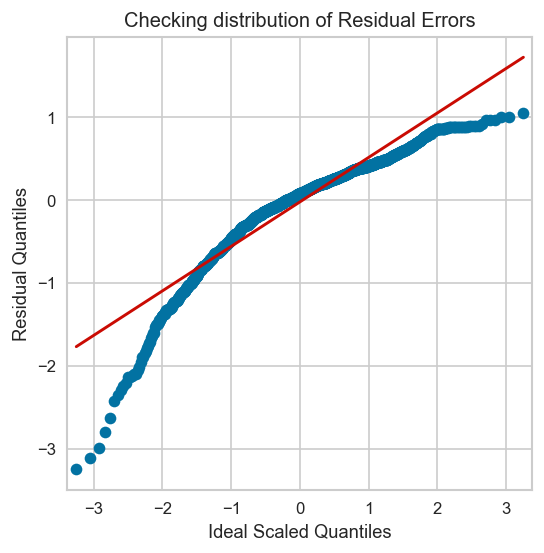

In [1135]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

The QQ-plot clearly verifies our findings from the the histogram of the residuals, the data is mostly normal in nature, but there sre some outliers on the higher end of the Residues.

From the ACF plot, we can clearly see that there is almost negligible correlation between the error terms. Hence there is no autocorrelation present in the data.

### Variance Inflation Factor (VIF) (Checking for multi collinearity)

In [1136]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(encoded_dropna.values, i) for i in range(encoded_dropna.shape[1])], index =encoded_dropna.columns)
VIF

Rating                            1.036456e+00
Reviews                           2.349686e+00
Size                              1.293789e+00
Installs                          1.040877e+00
Price                             1.071250e+00
Category_ART_AND_DESIGN                    inf
Category_AUTO_AND_VEHICLES                 inf
Category_BEAUTY                            inf
Category_BOOKS_AND_REFERENCE               inf
Category_BUSINESS                          inf
Category_COMICS                            inf
Category_COMMUNICATION                     inf
Category_DATING                            inf
Category_EDUCATION                         inf
Category_ENTERTAINMENT                     inf
Category_EVENTS                            inf
Category_FAMILY                            inf
Category_FINANCE                           inf
Category_FOOD_AND_DRINK                    inf
Category_GAME                              inf
Category_HEALTH_AND_FITNESS                inf
Category_HOUS

From this list, we clearly see that there happens to be no Independent Variable over the value of 5, which means that there are no features that exhibit the Multicollinearity in the dataset. Note that VIF only works for the Continuous Variables. 

## Model Interpretability

So far we have simply been predicting the values using the linear regression, But in order to Interpret the model, the normalising of the data is essential.

In [1137]:
# Creating instance of Linear Regresssion
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

In [1138]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mean_absolute_error(train_predict, train_y)
print('Training Mean Absolute Error', k )
mse = mean_squared_error(train_predict, train_y) 
print('Training Mean sq Error', mse )

Training Mean Absolute Error 0.39482812796433314
Training Mean sq Error 0.3067384823737799


In [1139]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mean_absolute_error(test_predict, test_y)
print('Test Mean Absolute Error    ', k )
mse = mean_squared_error(test_predict, test_y) 
print('testing Mean sq Error', mse )

Test Mean Absolute Error     0.3850474282743174
testing Mean sq Error 0.28877941033403487


Text(0.5, 1.0, 'Normalized Coefficient plot')

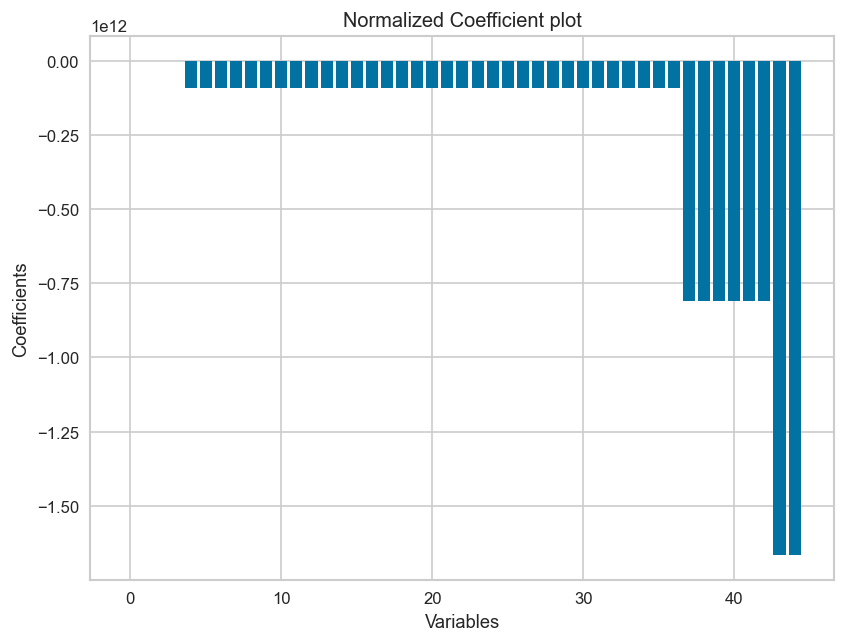

In [1140]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

Now the coefficients we see are normalised and we can easily make final inferences out of it.

Here we can see that there are a lot of Coefficients which are not near to zero and Significant.

### Lets treat outliers and deploy the model again: 

In [1141]:
df.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Type
0,ART_AND_DESIGN,3.9,78158306,14.0,500000,0.0,Everyone,Free
1,ART_AND_DESIGN,4.7,78128208,8.7,5000000,0.0,Everyone,Free
2,ART_AND_DESIGN,4.5,69119316,25.0,50000000,0.0,Teen,Free
3,ART_AND_DESIGN,4.3,69119316,2.8,100000,0.0,Everyone,Free
4,ART_AND_DESIGN,4.4,69109672,5.6,50000,0.0,Everyone,Free


In [1142]:
df.describe() 

,Rating,Reviews,Size,Installs,Price
count,7029.000000,8.434000e+03,8434.000000,8.434000e+03,8434.000000
mean,4.160777,4.425825e+05,20.391473,3.724633e+06,1.225682
std,0.559150,3.239663e+06,21.826363,2.482656e+07,18.026557
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.000000,2.200000e+01,4.600000,1.000000e+03,0.000000
50%,4.300000,7.040000e+02,12.000000,5.000000e+04,0.000000
75%,4.500000,2.507975e+04,28.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [1143]:
# Treating outliers for reviews: 
IQR = df['Reviews'].quantile(0.75) - df['Reviews'].quantile(0.25)
IQR

25057.75

In [1144]:
df['Reviews'].quantile(0.25), df['Reviews'].quantile(0.75)


(22.0, 25079.75)

In [1145]:
Q1 = df['Reviews'].quantile(0.25)
Q3 = df['Reviews'].quantile(0.75)

whisker_1 = Q1 - (1.5*IQR)
whisker_2 = Q3 + (1.5*IQR)

whisker_1, whisker_2

(-37564.625, 62666.375)

In [1146]:
# replacing the outliers with quantile value: 
df['Reviews'].loc[df['Reviews']<22] = Q1

In [1147]:
df['Reviews'].loc[df['Reviews']>22] = Q3

#### Treating outliers for Size:

In [1148]:
# Treating outliers for reviews: 
IQR = df['Size'].quantile(0.75) - df['Size'].quantile(0.25)
IQR

23.4

In [1149]:
df['Size'].quantile(0.25), df['Size'].quantile(0.75)


(4.6, 28.0)

In [1150]:
Q1 = df['Size'].quantile(0.25)
Q3 = df['Size'].quantile(0.75)

whisker_1 = Q1 - (1.5*IQR)
whisker_2 = Q3 + (1.5*IQR)

whisker_1, whisker_2

(-30.499999999999993, 63.099999999999994)

In [1151]:
# replacing the outliers with quantile value: 
df['Size'].loc[df['Size']<4.6] = Q1

In [1152]:
df['Size'].loc[df['Size']>28] = Q3

#### Installs: 

In [1153]:
# Treating outliers for reviews: 
IQR = df['Installs'].quantile(0.75) - df['Installs'].quantile(0.25)
IQR

999000.0

In [1154]:
df['Installs'].quantile(0.25), df['Installs'].quantile(0.75)


(1000.0, 1000000.0)

In [1155]:
Q1 = df['Installs'].quantile(0.25)
Q3 = df['Installs'].quantile(0.75)

whisker_1 = Q1 - (1.5*IQR)
whisker_2 = Q3 + (1.5*IQR)

whisker_1, whisker_2

(-1497500.0, 2498500.0)

In [1156]:
# replacing the outliers with quantile value: 
df['Installs'].loc[df['Installs']<1000.0] = Q1

In [1157]:
df['Installs'].loc[df['Installs']>1000000.0] = Q3

#### Price

In [1158]:
# Treating outliers for reviews: 
IQR = df[df['Type'] == 'Paid'].Price.quantile(0.75) - df[df['Type'] == 'Paid'].Price.quantile(0.25)
IQR

3.5

In [1159]:
df[df['Type'] == 'Paid'].Price.quantile(0.25), df[df['Type'] == 'Paid'].Price.quantile(0.75)


(1.49, 4.99)

In [1160]:
Q1 = df[df['Type'] == 'Paid'].Price.quantile(0.25)
Q3 = df[df['Type'] == 'Paid'].Price.quantile(0.75)

whisker_1 = Q1 - (1.5*IQR)
whisker_2 = Q3 + (1.5*IQR)

whisker_1, whisker_2

(-3.76, 10.24)

In [1161]:
# replacing the outliers with quantile value: 
df[df['Type'] == 'Paid'].Price.loc[df[df['Type'] == 'Paid'].Price < -3] = Q1

In [1162]:
df[df['Type'] == 'Paid'].Price.loc[df[df['Type'] == 'Paid'].Price > 10.24] = Q3

### Repeating modelling after outlier treatment. 

In [1163]:
encoded = pd.get_dummies(df)

In [1164]:
encoded.sample(5)

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Type_Free,Type_Paid
3152,3.0,25079.75,4.6,100000.0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2829,4.5,25079.75,4.6,10000.0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2012,4.6,25079.75,14.0,1000000.0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
431,4.1,25079.75,11.0,1000.0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
6886,NaN,22.00,4.6,1000.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [1165]:
encoded_1.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING',
       'Category_EDUCATION', 'Category_ENTERTAINMENT', 'Category_EVENTS',
       'Category_FAMILY', 'Category_FINANCE', 'Category_FOOD_AND_DRINK',
       'Category_GAME', 'Category_HEALTH_AND_FITNESS',
       'Category_HOUSE_AND_HOME', 'Category_LIBRARIES_AND_DEMO',
       'Category_LIFESTYLE', 'Category_MAPS_AND_NAVIGATION',
       'Category_MEDICAL', 'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER',
       'Content Rating_Adults only 18+', 'Content Rating_Everyon

In [1166]:
encoded_1.isnull().sum() 

Rating                            1405
Reviews                              0
Size                                 0
Installs                             0
Price                                0
Category_ART_AND_DESIGN              0
Category_AUTO_AND_VEHICLES           0
Category_BEAUTY                      0
Category_BOOKS_AND_REFERENCE         0
Category_BUSINESS                    0
Category_COMICS                      0
Category_COMMUNICATION               0
Category_DATING                      0
Category_EDUCATION                   0
Category_ENTERTAINMENT               0
Category_EVENTS                      0
Category_FAMILY                      0
Category_FINANCE                     0
Category_FOOD_AND_DRINK              0
Category_GAME                        0
Category_HEALTH_AND_FITNESS          0
Category_HOUSE_AND_HOME              0
Category_LIBRARIES_AND_DEMO          0
Category_LIFESTYLE                   0
Category_MAPS_AND_NAVIGATION         0
Category_MEDICAL         

In [1167]:
encoded_dropna = encoded.dropna(axis = 0)

### Segregating variables: Independent and Dependent Variables

In [1168]:
#seperating independent and dependent variables
x = encoded_dropna.drop(['Rating'], axis=1)
y = encoded_dropna['Rating']
x.shape, y.shape

((7029, 45), (7029,))

### Splitting the data into train set and the test set

In [1169]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

### Implementing Linear Regression

In [1170]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [1171]:
lr = LR() 
lr.fit(train_x, train_y)

LinearRegression()

In [1172]:
# Predicting: 
train_predict = lr.predict(train_x) 
k = mean_absolute_error(train_predict, train_y) 
r = r2_score(train_predict, train_y)
print('Training Mean Absolute Error', k )
mse = mean_squared_error(train_predict, train_y) 
print('Training Mean sq Error', mse )

Training Mean Absolute Error 0.39223331282435736
Training Mean sq Error 0.30311506515265985


In [1173]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mean_absolute_error(test_predict, test_y)
# r = r2_score(test_predict, test_y)
print('Test Mean Absolute Error    ', k )
mse = mean_squared_error(test_predict, test_y) 
print('Testing Mean sq Error', mse )

Test Mean Absolute Error     0.3804941604388488
Testing Mean sq Error 0.2804863951832286


In [1174]:
lr.coef_

array([ 2.19008903e-06, -9.75133972e-04,  1.57456998e-07, -1.08260721e-03,
        1.95801651e-01,  2.29447190e-02,  1.53404259e-01,  1.41178673e-01,
       -2.09730633e-02, -1.02181264e-01, -1.35607754e-01, -2.16803553e-01,
        1.29194020e-01, -9.47484631e-02,  3.72576181e-01,  8.58051248e-04,
       -3.36733538e-02, -9.50638611e-02,  7.19522256e-03,  2.48844911e-02,
       -4.40528799e-02,  6.29006883e-02, -2.89328442e-02, -1.39549374e-01,
       -3.03999224e-02, -1.88797857e-02,  2.25299484e-01,  9.89428856e-02,
       -1.19008677e-01, -5.13699236e-02,  2.09505830e-02,  1.05740292e-01,
        9.25873851e-03, -1.66580589e-01, -1.32053717e-01, -1.54435901e-01,
        1.31849879e-02,  2.71154680e-01, -8.64022462e-02, -7.66032123e-02,
       -9.51419661e-02, -5.47010639e-02,  4.16938084e-02, -7.85780746e-02,
        7.85780746e-02])

Text(0.5, 1.0, 'Coefficient plot')

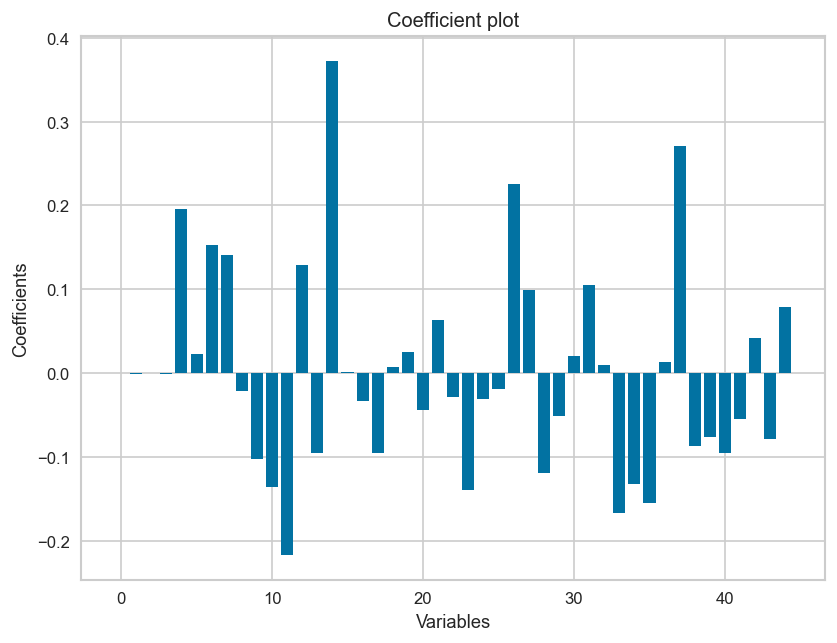

In [1175]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [1176]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
2992,4.0,4.387886,-0.387886
879,4.8,4.311003,0.488997
7405,4.9,4.029795,0.870205
2121,4.4,4.218561,0.181439
1431,4.8,4.254353,0.545647


In [1177]:
residuals.shape

(1758, 3)

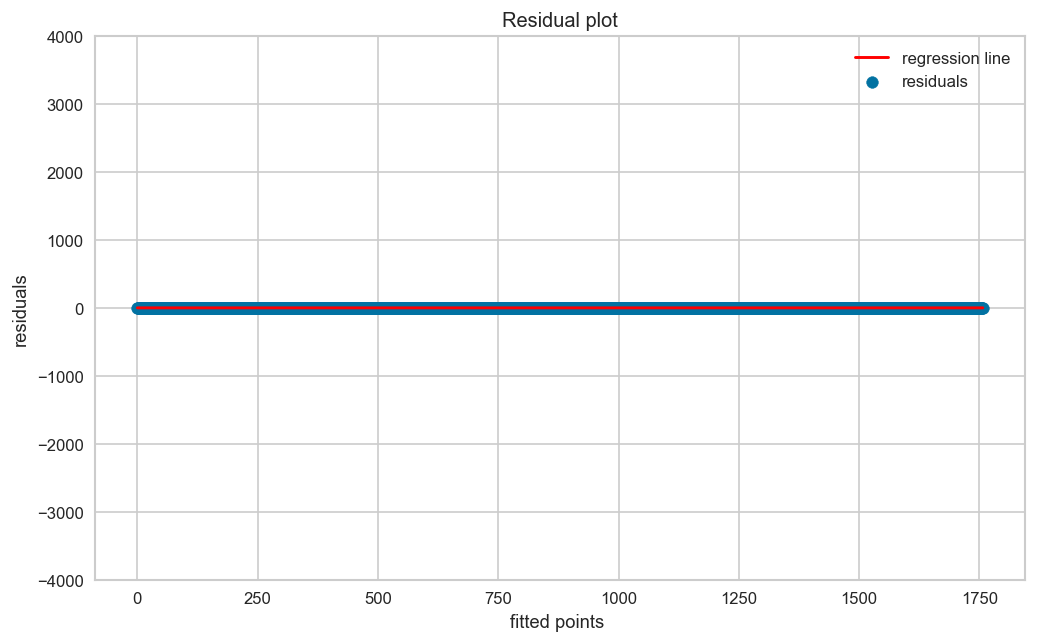

In [1178]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,1758)
k = [0 for i in range(0,1758)]
plt.scatter( f, residuals.residuals[:], label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-4000, 4000)
plt.legend()

The Residual plot clearly Looks Homoscedastic, i.e. the the variance of the error across the dataset is nearly constant.

### Checking Distribution of Residuals

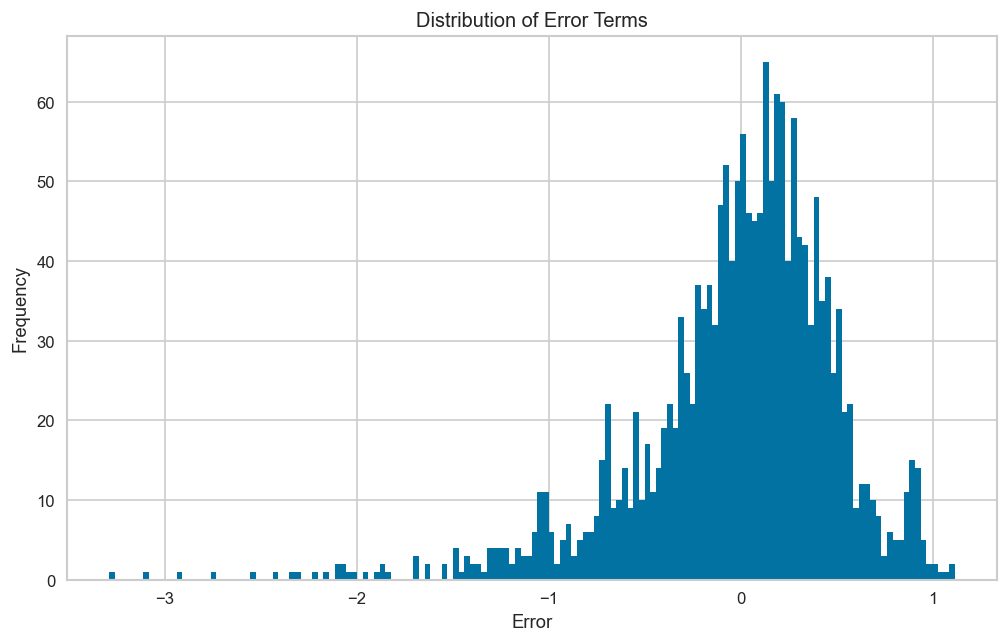

In [1179]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

According to the Histogram, the distribution of error is nearly normal, But there are some outliers on the Higher end of the errors.

### QQ-Plot (Is the data Normally Distributed?)

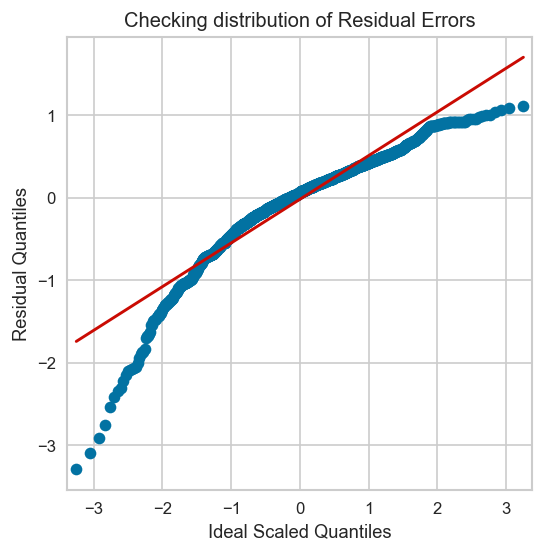

In [1180]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

The QQ-plot clearly verifies our findings from the the histogram of the residuals, the data is mostly normal in nature, but there sre some outliers on the higher end of the Residues.

From the ACF plot, we can clearly see that there is almost negligible correlation between the error terms. Hence there is no autocorrelation present in the data.

### Variance Inflation Factor (VIF) (Checking for multi collinearity)

In [1181]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(encoded_dropna.values, i) for i in range(encoded_dropna.shape[1])], index =encoded_dropna.columns)
VIF

Rating                            1.052466
Reviews                           1.087906
Size                              1.332587
Installs                          1.297208
Price                             1.072549
Category_ART_AND_DESIGN                inf
Category_AUTO_AND_VEHICLES             inf
Category_BEAUTY                        inf
Category_BOOKS_AND_REFERENCE           inf
Category_BUSINESS                      inf
Category_COMICS                        inf
Category_COMMUNICATION                 inf
Category_DATING                        inf
Category_EDUCATION                     inf
Category_ENTERTAINMENT                 inf
Category_EVENTS                        inf
Category_FAMILY                        inf
Category_FINANCE                       inf
Category_FOOD_AND_DRINK                inf
Category_GAME                          inf
Category_HEALTH_AND_FITNESS            inf
Category_HOUSE_AND_HOME                inf
Category_LIBRARIES_AND_DEMO            inf
Category_LI

From this list, we clearly see that there happens to be no Independent Variable over the value of 5, which means that there are no features that exhibit the Multicollinearity in the dataset. Note that VIF only works for the Continuous Variables. 

## Model Interpretability

So far we have simply been predicting the values using the linear regression, But in order to Interpret the model, the normalising of the data is essential.

In [1182]:
# Creating instance of Linear Regresssion
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

In [1183]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mean_absolute_error(train_predict, train_y)
print('Training Mean Absolute Error', k )
mse = mean_squared_error(train_predict, train_y) 
print('Training Mean sq Error', mse )

Training Mean Absolute Error 0.39224060324920557
Training Mean sq Error 0.30311500565006305


In [1184]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mean_absolute_error(test_predict, test_y)
print('Test Mean Absolute Error    ', k )
mse = mean_squared_error(test_predict, test_y) 
print('testing Mean sq Error', mse )

Test Mean Absolute Error     0.3805024408507537
testing Mean sq Error 0.28048632949641544


Text(0.5, 1.0, 'Normalized Coefficient plot')

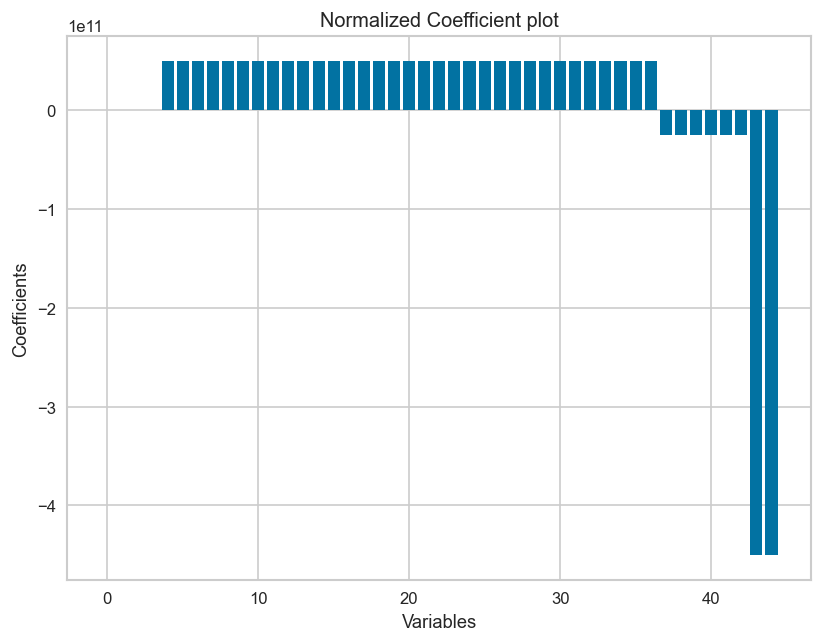

In [1185]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

Now the coefficients we see are normalised and we can easily make final inferences out of it.

Here we can see that there are a lot of Coefficients which are not near to zero and Significant.

In [1186]:
#seperating independent and dependent variables
x = encoded_dropna.drop(['Rating'], axis=1)
y = encoded_dropna['Rating']
x.shape, y.shape

((7029, 45), (7029,))

In [1187]:
Coefficients = pd.DataFrame({
    'Variable'    : x.columns,
    'coefficient' : lr.coef_
})
Coefficients.head()

,Variable,coefficient
0,Reviews,2.190089e-06
1,Size,-9.788965e-04
2,Installs,1.576183e-07
3,Price,-1.082676e-03
4,Category_ART_AND_DESIGN,5.017015e+10


In [1188]:
sig_var = Coefficients[Coefficients.coefficient > 0.5]

In [1189]:
subset = encoded_dropna[sig_var['Variable'].values]
subset.head()

,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1190]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(subset, y , random_state = 56)

In [1191]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [1192]:
# Creating instance of Linear Regresssion with Normalised Data
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

In [1194]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 0.3976915996727376


In [1195]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )
mse = mean_squared_error(test_predict, test_y) 
print('testing Mean sq Error', mse )

Test Mean Absolute Error     0.3848736134812287
testing Mean sq Error 0.288268901664378


Text(0.5, 1.0, 'Normalized Coefficient plot')

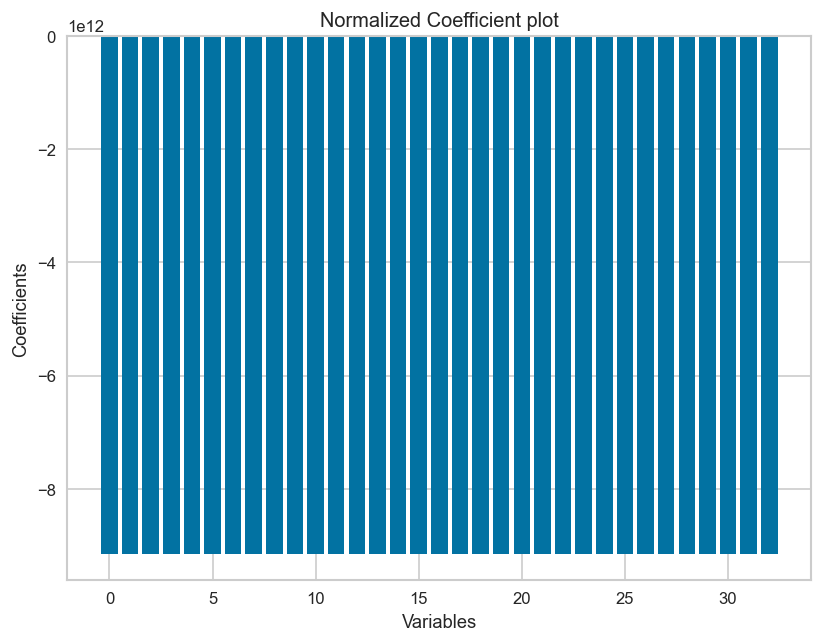

In [1196]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

In [1204]:
df_new = test_y.copy() 
df_new['Prediction'] = test_predict
df_new.rename({'':'Actual'}, axis = 1,inplace=True);
df_new.head() 

2992      4
879     4.8
7405    4.9
2121    4.4
1431    4.8
Name: Rating, dtype: object